In [ ]:
# ! kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess -p 'data/'
# unzip toronto-emotional-speech-set-tess

In [34]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import librosa
import librosa.display
from IPython.display import Audio

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras import utils

import warnings
warnings.filterwarnings('ignore')

In [2]:
paths = []
labels = []

data_path = 'data/TESS Toronto emotional speech set data'

for dirname, _, filenames in os.walk(data_path):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    
    if len(paths) == 2800:
        break

print('Dataset is loaded')

Dataset is loaded


<Axes: xlabel='label', ylabel='count'>

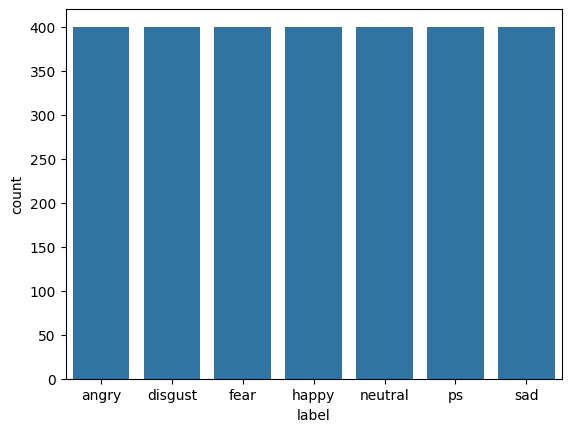

In [3]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
sns.countplot(data = df, x = 'label')

In [4]:
def waveplot(data, sr, emotion):
    plt.figure(figsize = (10, 4))
    plt.title(emotion, size = 20)
    librosa.display.waveshow(data, sr = sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize = (11, 4))
    plt.title(emotion, size = 20)
    librosa.display.specshow(xdb,
                             sr = sr,
                             x_axis = 'time',
                             y_axis = 'hz')
    plt.colorbar()

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

### 02 - Feature Extraction

In [9]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 40).T, axis = 0)
    return mfcc

In [11]:
X_mfcc = df['speech'].apply(lambda x : extract_mfcc(x))
X_mfcc

In [14]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])
y = y.toarray()
y.shape

(2800, 7)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size = 0.2,
                                                  random_state = 42)

In [ ]:
print(f'X Train Size {X_train.shape}')
print(f'X Val Size {X_val.shape}')
print(f'Y Train Size {y_train.shape}')
print(f'Y Val Size {y_val.shape}')

### 03 - LSTM Model

In [ ]:
model = Sequential([
    LSTM(256, return_sequences = False, input_shape = (40, 1)),
    Dropout(0.5), # Add Drop out after LSTm layer
    Dense(128, activation = 'relu'),
    Dropout(0.5), # Add Drop out after LSTm layer
    Dense(64, activation = 'relu'),
    Dropout(0.5), # Add Drop out after LSTm layer
    Dense(7, activation = 'softmax'),
])

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
model.summary()
Model : 'sequential'

In [48]:
history = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    epochs = 30,
                    batch_size = 64)

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 337ms/step - accuracy: 0.2709 - loss: 1.8505 - val_accuracy: 0.6857 - val_loss: 0.9744
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 353ms/step - accuracy: 0.5821 - loss: 1.0551 - val_accuracy: 0.8089 - val_loss: 0.5543
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 304ms/step - accuracy: 0.7540 - loss: 0.6625 - val_accuracy: 0.8839 - val_loss: 0.2889
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 332ms/step - accuracy: 0.8822 - loss: 0.3749 - val_accuracy: 0.9411 - val_loss: 0.1618
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 312ms/step - accuracy: 0.8954 - loss: 0.3577 - val_accuracy: 0.9804 - val_loss: 0.0848
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 344ms/step - accuracy: 0.9485 - loss: 0.2071 - val_accuracy: 0.9607 - val_loss: 0.1128
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 319ms/step - accuracy: 0.9445 - loss: 0.1878 - val_accuracy: 0.9857 - val_loss: 0.0488
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 320ms/step - accuracy: 0.9549 - loss: 0.1431 - val_accu

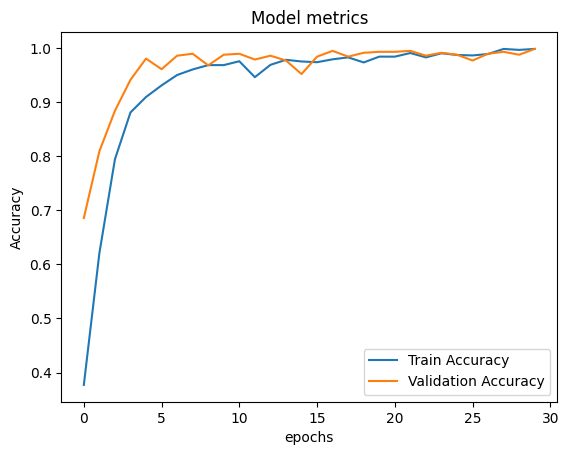

In [52]:
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label = 'Train Accuracy')
plt.plot(epochs, val_acc, label = 'Validation Accuracy')

plt.title('Model metrics')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

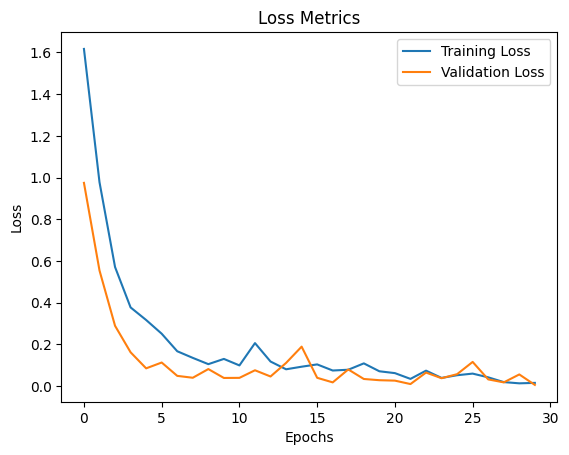

In [61]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')

plt.title('Loss Metrics')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()